#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






Файл с ЭКГ сигналом (ecg.csv) в папке

In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install wfdb

Note: you may need to restart the kernel to use updated packages.Collecting wfdb
     ---------------------------------------- 0.0/160.0 kB ? eta -:--:--
     --------- --------------------------- 41.0/160.0 kB 991.0 kB/s eta 0:00:01
     ----------------------- ------------ 102.4/160.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 160.0/160.0 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.0 MB 7.0 MB/s eta 0:00:01
     -------- ------------------------------- 0.2/1.0 MB 2.8 MB/s eta 0:00:01
     --------- ------------------------------ 0.2/1.0 MB 2.9 MB/s eta 0:00:01
     ---------- ----------------------------- 0.3/1.0 MB 1.7 MB/s eta 0:00:01
     ------------------- -------------------- 0.5/1.0 MB 2.9 MB/s eta 0:00:01
     --------------------------- ------------ 0.7/1.0 MB 2.7 MB/s eta 0:00:01
     ------------------------------- -------- 0.8/1.0 MB 2.8 MB/s e


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install heartpy

     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.0 MB 1.3 MB/s eta 0:00:01
     ------- -------------------------------- 0.2/1.0 MB 2.0 MB/s eta 0:00:01
     -------------- ------------------------- 0.4/1.0 MB 2.9 MB/s eta 0:00:01
     ----------------- ---------------------- 0.4/1.0 MB 3.1 MB/s eta 0:00:01
     -------------------------------------- - 1.0/1.0 MB 4.7 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
#модули, которые нам понадобятся
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

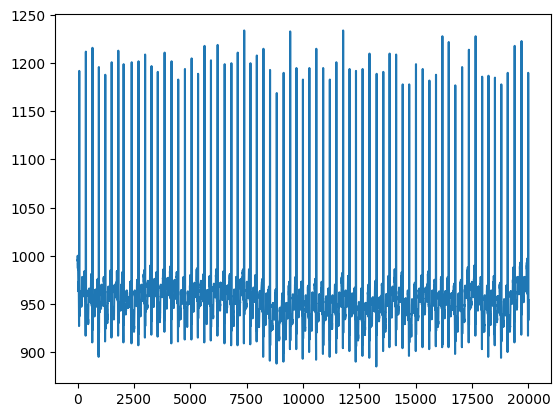

In [14]:
#загрузка сигнала из .csv файла с pandas
df = pd.read_csv('/Users/ribka/Downloads/ecg.csv')
plt.plot(df['MLII'])
plt.show()

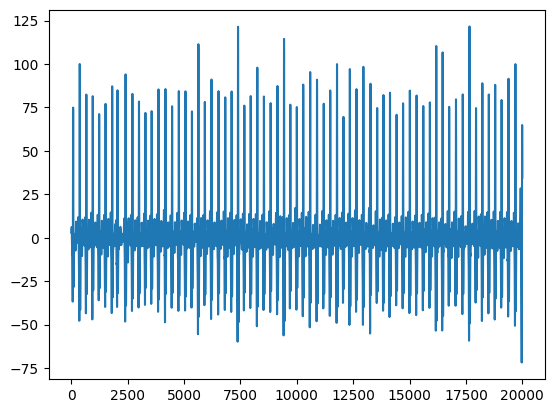

In [15]:
#фильтрация сигнала с библиотекой heartpy
filtered = hp.filter_signal(df['MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
plt.plot(filtered)
plt.show()

Дата записи сигнала: 2023-01-05
Длина сигнала: 20000


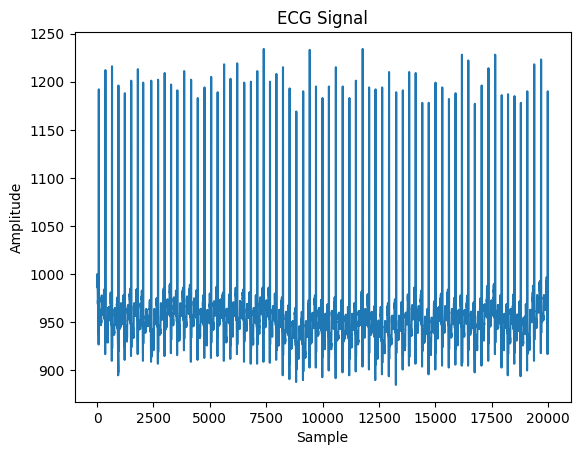

Статистика RR интервалов: {'mean': 289, 'std': 31, 'min': 66, 'max': 358}


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import heartpy as hp
from scipy.signal import find_peaks
import numpy as np

class exp:
    def __init__(self, data):
        self.data = data
        self.path_signal = data['signal']
        self.parameters = data['parameters']
        self.signal = self.load_signal()

    def load_signal(self):
        df = pd.read_csv(self.path_signal)
        return df['MLII'].values

    def get_date(self):
        return self.data['date']

    def get_signal_length(self):
        return len(self.signal)

    def plot_signal(self):
        plt.plot(self.signal)
        plt.title("ECG Signal")
        plt.xlabel("Sample")
        plt.ylabel("Amplitude")
        plt.show()

    def _signal_filtration(self, filtration_parameters=None):
        if filtration_parameters is None:
            filtration_parameters = {'cutoff': [0.75, 3.5], 'sample_rate': 100, 'order': 3, 'filtertype': 'bandpass'  }

        filtered_signal = hp.filter_signal(self.signal, 
                                            cutoff=filtration_parameters['cutoff'], 
                                            sample_rate=filtration_parameters['sample_rate'], 
                                            order=filtration_parameters['order'], 
                                            filtertype=filtration_parameters['filtertype'])
        return filtered_signal

    def _signal_find_peaks(self, signal, find_peaks_parameters=None):
        if find_peaks_parameters is None:
            find_peaks_parameters = {'height': 20}
            
        peaks, _ = find_peaks(signal, **find_peaks_parameters)
        return peaks

    def _calculate_RR_intervals(self):
        filtered_signal = self._signal_filtration()
        peaks = self._signal_find_peaks(filtered_signal)
        rr_intervals = np.diff(peaks)
        return rr_intervals

    def get_RR_statistics(self):
        rr_intervals = self._calculate_RR_intervals()
        return {
            'mean': round(np.mean(rr_intervals)),
            'std': round(np.std(rr_intervals)),
            'min': round(np.min(rr_intervals)),
            'max': round(np.max(rr_intervals))
        }

data = {
    'date': '2023-01-05',
    'signal': '/Users/ribka/Downloads/ecg.csv',
    'parameters': {}
}

experiment = exp(data)
print("Дата записи сигнала:", experiment.get_date())
print("Длина сигнала:", experiment.get_signal_length())
experiment.plot_signal()
print("Статистика RR интервалов:", experiment.get_RR_statistics())

##Задача ** "Минигольф"

 в папке на githab